In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   
import numpy as np

pd.options.display.max_columns=None

def json_to_dataframe(responce):
    return pd.DataFrame(responce.json()[1:],columns=responce.json()[0])

C:\Users\Geord\AppData\Local\Temp\ipykernel_20284\2889458018.py:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


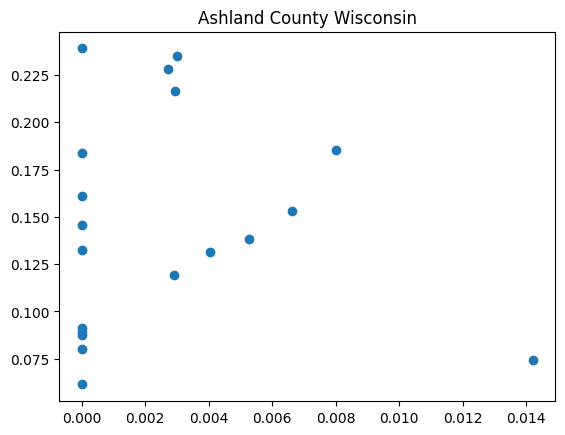

In [7]:
## under 18, doing all subdivisions in a county

url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B04006)&for=county%20subdivision:*&in=state:55&in=county:001&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
responce=requests.request("GET",url)
ethnicData=json_to_dataframe(responce)
ethnicData=ethnicData.sort_values("GEO_ID")
totalPopulation=ethnicData["B04006_001E"].astype(int)
finnishPopulation=ethnicData["B04006_039E"].astype(int)
finnishPercent=list(finnishPopulation/totalPopulation)

url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B09001)&for=county%20subdivision:*&in=state:55&in=county:001&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
responce=requests.request("GET",url)
ageData=json_to_dataframe(responce)
ageData=ageData.sort_values("GEO_ID")
under18=ageData["B09001_001E"].astype(int)
under18Percent=list(under18/totalPopulation)


#print(pearsonr(finnishPercent,under18Percent))

plt.title("Ashland County Wisconsin")
plt.scatter(finnishPercent,under18Percent)

In [ ]:
## under 18, doing all counties in a state
FIPS=["001","003","005","007","009","011","013","015","017","019","021","023","025","027","029","031","033","035","037","039","041","043","045","047","049","051","053","055","057","059","061","063","065","067","069","071"]
for c in FIPS:
    try:
        url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B04006)&for=county%20subdivision:*&in=state:41&in=county:"+(c)+"&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
        responce=requests.request("GET",url)
        ethnicData=json_to_dataframe(responce)
        ethnicData=ethnicData.sort_values("GEO_ID")
        totalPopulation=ethnicData["B04006_001E"].astype(int)
        finnishPopulation=ethnicData["B04006_039E"].astype(int)
        finnishPercent=list(finnishPopulation/totalPopulation)
        
        url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B09001)&for=county%20subdivision:*&in=state:41&in=county:"+(c)+"&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
        responce=requests.request("GET",url)
        ageData=json_to_dataframe(responce)
        ageData=ageData.sort_values("GEO_ID")
        under18=ageData["B09001_001E"].astype(int)
        under18Percent=list(under18/totalPopulation)
    
        print(pearsonr(finnishPercent,under18Percent))
    except:
        print("error")


In [ ]:
#B11016008

In [ ]:
## household size 7+, doing all counties in a state
FIPS=["001","003","005","007","009","011","013","015","017","019","021","023","025","027","029","031","033","035","037","039","041","043","045","047","049","051","053","055","057","059","061","063","065","067","069","071","073","075","077","078","079","081","083","085","087","089","091","093","095","097","099","101","103","105","107","111","113","115","117","109","119","121","123","125","127","129","131","133","135","137","139","141"]
for c in FIPS:
    try:
        url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B04006)&for=county%20subdivision:*&in=state:55&in=county:"+(c)+"&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
        responce=requests.request("GET",url)
        ethnicData=json_to_dataframe(responce)
        ethnicData=ethnicData.sort_values("GEO_ID")
        totalPopulation=ethnicData["B04006_001E"].astype(int)
        finnishPopulation=ethnicData["B04006_039E"].astype(int)
        finnishPercent=list(finnishPopulation/totalPopulation)
        
        url="https://api.census.gov/data/2022/acs/acs5?get=NAME,group(B11016)&for=county%20subdivision:*&in=state:55&in=county:"+(c)+"&key=c4b9bb32ff21994e8a5da5f602dedf08ec1cf527"
        responce=requests.request("GET",url)
        sizeData=json_to_dataframe(responce)
        sizeData=sizeData.sort_values("GEO_ID")
        totalHouseholds=sizeData["B11016_001E"].astype(int)
        sevenPlus=sizeData["B11016_008E"].astype(int)
        sevenPlusPercent=list(sevenPlus/totalHouseholds)
    
        print(pearsonr(finnishPercent,sevenPlusPercent))
    except:
        print("error")
